# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
%pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
print (tf.__version__)

2.20.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [ ]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10

In [ ]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [ ]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [ ]:
x_train.max(), x_train.min(), x_train.mean()

(np.uint8(255), np.uint8(0), np.float64(120.70756512369792))

In [ ]:
y_train.max(), y_train.min()

(np.uint8(9), np.uint8(0))

In [ ]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [ ]:
# Normalizing the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.max(), x_train.min(), x_train.mean()

(np.float64(1.0), np.float64(0.0), np.float64(0.4733630004850874))

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

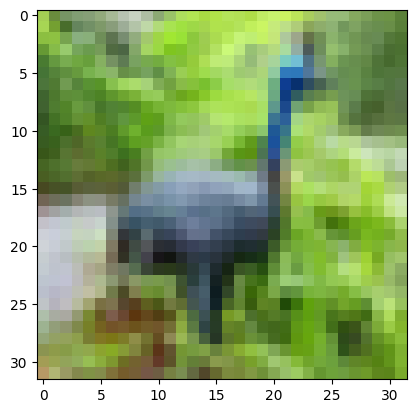

In [ ]:
plt.imshow(x_train[6])

In [ ]:
y_train[6]

array([2], dtype=uint8)

In [ ]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

# Step 3: Building the CNN

In [ ]:
# Defining the object
model = tf.keras.models.Sequential()

In [ ]:
# Adding first CCN layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape = [32, 32, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Adding second CNN layer and maxpool layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
# Adding third CNN layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [ ]:
# Adding fourth CNN layer and maxpool layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding the Flattening layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# Adding second dense layer (output layer)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Training the model

In [ ]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
 703/1000 ━━━━━━━━━━━━━━━━━━━━ 1:22 279ms/step - loss: 0.7561 - sparse_categorical_accuracy: 0.7301

KeyboardInterrupt: 

# Step 5: Model evaluation and prediction

In [ ]:
# evaluate the model performane
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - loss: 0.8191 - sparse_categorical_accuracy: 0.7090


In [ ]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuracy is: 0.7070000171661377


In [ ]:
# Predictions
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

In [ ]:
print(y_pred[0]), print(y_test[0])

1
[3]


(None, None)

In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[857 143   0   0   0   0   0   0   0   0]
 [109 891   0   0   0   0   0   0   0   0]
 [579 421   0   0   0   0   0   0   0   0]
 [652 348   0   0   0   0   0   0   0   0]
 [545 455   0   0   0   0   0   0   0   0]
 [561 439   0   0   0   0   0   0   0   0]
 [358 642   0   0   0   0   0   0   0   0]
 [315 685   0   0   0   0   0   0   0   0]
 [190 810   0   0   0   0   0   0   0   0]
 [188 812   0   0   0   0   0   0   0   0]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.1748
